In [3]:
import os
import numpy as np
import sys
import h5py
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../heart_rhythm_analysis'))    # make repo root importable

from heart_rhythm_analysis.get_data.CapnoBaseETL import CapnoBaseETL
from heart_rhythm_analysis.get_data.MimicAFETL import MimicAFETL


In [4]:
def load_as_df(file_path, filename, store_signals=True, bPlot=True):
    import h5py
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    h5_path = f"{file_path}/{filename}.h5"
    hf = h5py.File(h5_path, "r")

    rows = []
    for subj in hf.keys():
        subj_grp = hf[subj]
        for win_id in subj_grp.keys():
            win_grp = subj_grp[win_id]
            rec_id = win_grp.attrs['rec_id']
            label = win_grp.attrs['label']
            raw_ppg = win_grp["raw_ppg"][:]
            proc_ppg = win_grp["proc_ppg"][:]
            fs = win_grp.attrs["fs"]
            row_data = {
                "subject": subj,
                "window_id": win_id,
                "rec_id": rec_id,
                "label": label,
                "fs_out": fs,
                "raw_len": len(raw_ppg),
                "proc_len": len(proc_ppg),
                "duration_raw_s": len(raw_ppg) / fs,
                "duration_proc_s": len(proc_ppg) / fs
            }
            
            if store_signals:
                row_data["raw_ppg"] = raw_ppg
                row_data["proc_ppg"] = proc_ppg
            
            rows.append(row_data)

    # Build DataFrame
    df = pd.DataFrame(rows)
    print(f"\nTotal windows: {len(df)}")

    if bPlot:
        first = df.iloc[np.random.randint(0, len(df))]
        y = first["proc_ppg"]
        t = np.arange(len(y)) / first.fs_out

        plt.figure(figsize=(8, 3))
        plt.plot(t, y)
        plt.title(f"Subject {first.subject} – Window {first.window_id}\nfs={first.fs_out} Hz")
        plt.xlabel("Time [s]")
        plt.ylabel("Amplitude")
        plt.tight_layout()
        plt.show()

    hf.close()
    return df

# Create Capno Dataset

Saved windows HDF5 to ../data/processed/length_full/capnobase_db/capnobase_db.h5

Total windows: 672


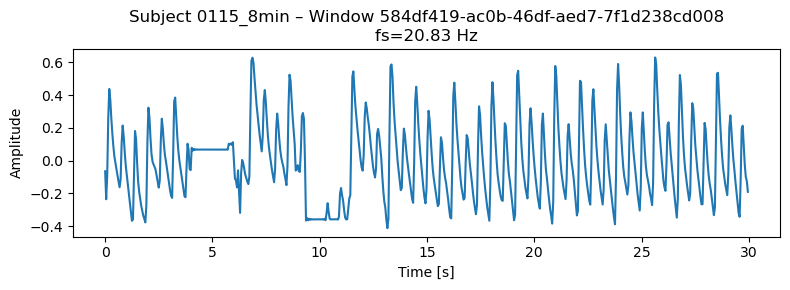

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s,raw_ppg,proc_ppg
0,0009_8min,33f8f6d5-d5f7-42d2-9901-96b22064b880,0,-1,20.83,9000,625,432.069131,30.004801,"[-4.4, -4.56, -4.61, -4.67, -4.72, -4.8, -4.88...","[-0.087420106, -0.17682284, 0.25465035, 0.3848..."
1,0009_8min,3c378aac-2284-435f-b8c1-d3c3e0fc0850,0,-1,20.83,9000,625,432.069131,30.004801,"[2.0, 1.76, 1.68, 1.6, 1.52, 1.41, 1.31, 1.2, ...","[0.090361565, 0.0828664, 0.012848765, -0.02590..."
2,0009_8min,3ca0af7c-ae62-4a2c-ac4c-4ff5a01cce50,0,-1,20.83,9000,625,432.069131,30.004801,"[7.84, 8.32, 8.32, 8.32, 8.32, 8.27, 8.21, 8.1...","[0.3167048, 0.49127418, 0.32590473, 0.3210883,..."
3,0009_8min,4df55943-772b-4e52-8a57-cfa36232c950,0,-1,20.83,9000,625,432.069131,30.004801,"[-0.96, -0.96, -0.99, -1.01, -1.04, -1.04, -1....","[0.048770934, 0.023059666, 0.034405172, -0.006..."
4,0009_8min,5d7cc20a-acd4-4fef-b809-1f9633e91fe3,0,-1,20.83,9000,625,432.069131,30.004801,"[2.88, 2.4, 2.27, 2.13, 2.0, 1.87, 1.73, 1.6, ...","[0.124216646, 0.11577979, 0.020816416, -0.0017..."
5,0009_8min,67ea0ff0-3bd0-41d7-882e-e0402fffa52d,0,-1,20.83,9000,625,432.069131,30.004801,"[6.4, 5.76, 5.55, 5.33, 5.12, 4.91, 4.69, 4.48...","[0.2421323, 0.28679162, 0.1652177, 0.11490333,..."
6,0009_8min,8f01f08e-0188-4c41-b223-068185ca16f7,0,-1,20.83,9000,625,432.069131,30.004801,"[-0.64, -0.64, -0.67, -0.69, -0.72, -0.72, -0....","[0.043668002, 0.006353259, -0.026493967, 0.247..."
7,0009_8min,a4e41d4d-285c-492b-b431-ff374d8d0ba2,0,-1,20.83,9000,625,432.069131,30.004801,"[-10.16, -10.16, -10.16, -10.16, -10.16, -10.1...","[-0.1732355, -0.4589821, -0.41107863, -0.32879..."
8,0009_8min,a858be2a-c46f-4f99-8b36-9f30ae6fd92d,0,-1,20.83,9000,625,432.069131,30.004801,"[0.08, 0.0, -0.03, -0.05, -0.08, -0.11, -0.13,...","[0.06296399, 0.045360774, 0.01701495, 0.012223..."
9,0009_8min,af917cc9-30b2-4d69-8ba7-f70c9d8d8f4c,0,-1,20.83,9000,625,432.069131,30.004801,"[-2.64, -2.8, -2.88, -2.96, -3.04, -3.07, -3.0...","[0.01978594, -0.09605849, -0.14535573, -0.2436..."


In [6]:
# %autoreload 2



def main():
    root_path = os.path.join('../data/raw/capnobase/data/mat')
    out_path = os.path.join('../data/processed/length_full/capnobase_db')
    out_filename = 'capnobase_db'
    if not os.path.exists(out_path):
        os.mkdir(out_path)

    fs_in = 100.00
    fs_out = 20.83

    config = {
    "input_dir"      : root_path,
    "output_dir"     : out_path,
    "window_size_sec": 30,
    "fs_in"          : fs_in,
    "fs_out"   : fs_out,
    "lowpass_cutoff" : (fs_out / 2),
    "fir_numtaps"    : 129,
    "zero_phase"     : True,
    "out_filename" :  out_filename
}
    cfg = {'input_dir': root_path, 'output_dir': out_path}
    etl = CapnoBaseETL(config)
    h5file = etl.process_all()
    print(f"Saved windows HDF5 to {h5file}")
    df = load_as_df(out_path,out_filename)

    display(df.head(10))
    return df
if __name__ == "__main__":
    df_capnobase = main()

# MIMIC III AF DATASET

In [7]:

def main():
    root_path = os.path.join('../data/raw/mimic_af_nonaf/mimic_af_data.mat')
    out_filename = 'mimic_af_db'
    out_path = os.path.join('../data/processed/length_full/mimic_af_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 20.83,
        "window_size_sec": 30,
        "scale_type": "norm",
        "zero_phase": True,
        "out_filename": out_filename
    }
    
    etl = MimicAFETL(config)
    out_file = etl.process()
    print("Saved AF windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df

if __name__ == "__main__":
    df_mimc_af = main()
    

Loading ../data/raw/mimic_af_nonaf/mimic_af_data.mat


AttributeError: 'mat_struct' object has no attribute 'notes'

# MIMIC III Non-AF Dataset

Loading ../data/raw/mimic_af_nonaf/mimic_non_af_data.mat
Saved non AF windows to ../data/processed/length_full/mimic_non_af_db/mimic_non_af_db.h5

Total windows: 9412
9227


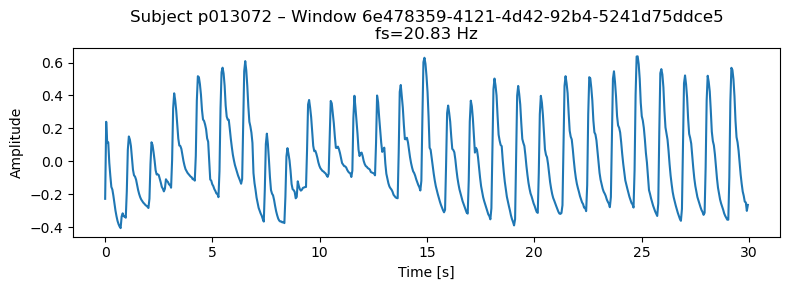

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s
0,p004829,00025203-a07d-4c7a-baf3-0bfd337d40a6,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
1,p004829,00613887-32c7-4c16-a3ff-814dc8c87dc8,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
2,p004829,00902630-06dd-4f67-ad8c-c77317303a52,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
3,p004829,00c04010-0b9b-4c2c-abf9-1af99bb828d8,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
4,p004829,00f83df8-0fc8-4ed9-b4b5-2216db2f9a18,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
5,p004829,01a5f92a-96b0-43c5-8477-382638b7b640,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
6,p004829,01b8d326-a974-45b8-9aa1-15cc2e128ff5,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
7,p004829,01cb19a4-947d-414a-a43c-1a0e086119e4,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
8,p004829,01f25c0e-add8-4c60-8544-d16aae0e3e24,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801
9,p004829,028c48ec-1a40-46a0-b7ab-6568f2b1796f,p004829-2103-08-30-21-52,0,20.83,3750,625,180.028805,30.004801


In [11]:
def main():
    root_path = os.path.join('../data/raw/mimic_af_nonaf/mimic_non_af_data.mat')
    out_filename = 'mimic_non_af_db'
    out_path = os.path.join('../data/processed/length_full/mimic_non_af_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 20.83,
        "window_size_sec": 30,
        "scale_type": "norm",
        "zero_phase": True,
        "out_filename": out_filename   
    }

    etl = MimicAFETL(config)
    out_file = etl.process()
    print("Saved non AF windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df
if __name__ == "__main__":
    df_mimc_nonaf = main()

# MIMIC III Ethnicity Subset

Loading ../data/raw/mimic_ethnicity_data/mimic_ethnicity_struct_output.mat
Saved General MIMIC III - Ethnicity windows to ../data/processed/length_full/mimic_ethnicity_db/mimic_ethnicity_db.h5

Total windows: 596
82


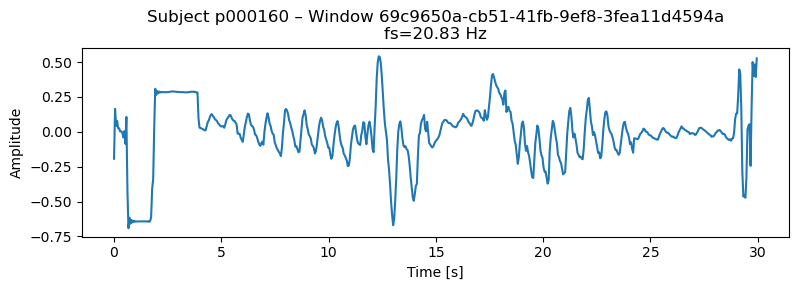

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s
0,p000107,00890e8b-c921-4ce0-9cde-4626c6de6c91,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
1,p000107,0788452f-a0aa-4604-8fec-bfb05702419a,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
2,p000107,08324611-bfe1-4f3e-9c62-d27884e82cb6,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
3,p000107,086fcd2c-504a-476e-bc44-49bce164b356,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
4,p000107,0b5afe30-08e8-491f-8fef-b3ee3b8c283c,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
5,p000107,0ddd483d-6b9f-4ebd-b297-e2cb8601add7,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
6,p000107,0e4a0f0c-8188-4c5a-9ba2-081ed1cc1d9e,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
7,p000107,0f61179f-b2f0-4ba3-ba59-0a7df586e48d,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
8,p000107,15d4ce01-0262-4d45-aed1-b8589327d534,3860035_0031,-1,20.83,3750,625,180.028805,30.004801
9,p000107,17f004ec-b869-4514-8de0-0e893d6327e3,3860035_0031,-1,20.83,3750,625,180.028805,30.004801


In [12]:
def main():
    root_path = os.path.join('../data/raw/mimic_ethnicity_data/mimic_ethnicity_struct_output.mat')
    out_filename = 'mimic_ethnicity_db'
    out_path = os.path.join('../data/processed/length_full/mimic_ethnicity_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": 125.00,
        "fs_out": 20.83,
        "window_size_sec": 30,
        "scale_type": "norm",
        "zero_phase": True,
        "out_filename": out_filename 
    }
    
    etl = MimicAFETL(config)
    out_file = etl.process()
    print("Saved General MIMIC III - Ethnicity windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df
if __name__ == "__main__":
    df_mimic_gen = main()

In [28]:
all_subjects = df_mimic_gen['subject'].unique()
all_subjects

array(['p000107', 'p000124', 'p000160', 'p000188', 'p000333', 'p000543',
       'p000618', 'p000652', 'p000735', 'p000773'], dtype=object)

In [ ]:
df_capnobase['subject'].unique()
df_mimc_nonaf['subject'].unique()
df_mimc_nonaf['subject'].unique()
df_mimic_gen['subject'].unique()

['p000946-2120-05-14-08-08' 'p022954-2136-02-29-17-52'
 'p025117-2202-03-15-20-28' 'p026377-2111-11-17-16-46'
 'p050089-2157-08-23-16-37' 'p063039-2157-03-29-13-35'
 'p068956-2107-04-21-16-05' 'p069339-2133-12-09-21-14'
 'p075371-2119-08-22-00-53' 'p077729-2120-08-31-01-03'
 'p079998-2101-10-21-21-31' 'p081349-2120-02-11-06-35'
 'p085866-2178-03-20-17-11' 'p087275-2108-08-29-12-53'
 'p089565-2174-05-12-00-07' 'p092846-2129-12-21-13-12'
 'p094847-2112-02-12-19-56']
['p004829-2103-08-30-21-52' 'p013072-2194-01-22-16-13'
 'p015852-2148-05-03-18-39' 'p016684-2188-01-29-00-06'
 'p019608-2125-02-05-04-57' 'p023824-2182-11-27-14-22'
 'p026964-2147-01-11-18-03' 'p029512-2188-02-27-18-10'
 'p050384-2195-01-30-02-21' 'p055204-2132-06-30-09-34'
 'p058932-2120-10-13-23-15' 'p062160-2153-10-03-14-49'
 'p063628-2176-07-02-20-38' 'p087675-2104-12-05-03-53'
 'p097547-2125-10-21-23-43']
['3860035_0031' '3931528_0188' '3531764_0003' '3285727_0015'
 '3092245_0062' '3047369_0011' '3481389_0008' '3488442_0

Loading ../data/raw/mimic4_data/mimic4_fibrillation_struct.mat
Saved General MIMIC III - Ethnicity windows to ../data/processed/length_full/mimic4_fibrillation_db/mimic4_fibrillation_db.h5

Total windows: 2040


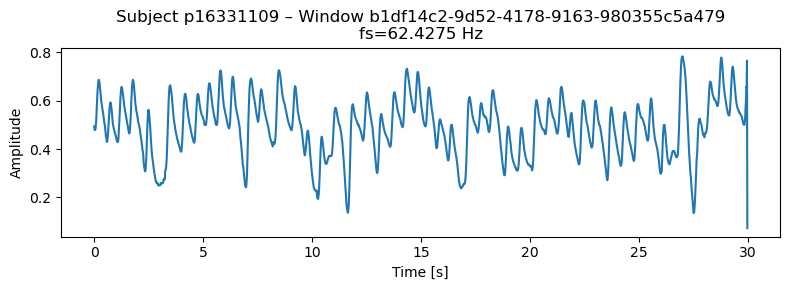

,subject,window_id,rec_id,label,fs_out,raw_len,proc_len,duration_raw_s,duration_proc_s,raw_ppg,proc_ppg
0,p10014354,08ece7f6-ee29-4ceb-9e28-01a4bda0e1ef,81739927_0008,-1,62.4275,1874,1873,30.018822,30.002803,"[0.52319336, 0.54125977, 0.55078125, 0.5541992...","[0.52328753, 0.541732, 0.5511086, 0.5546033, 0..."
1,p10014354,0c494c43-cf1a-4eb2-be06-10b18a62af12,81739927_0008,-1,62.4275,1874,1873,30.018822,30.002803,"[0.5107422, 0.5058594, 0.5, 0.49414062, 0.4892...","[0.51082695, 0.50628763, 0.5002688, 0.49448586..."
2,p10014354,11ddd3dd-fb64-49a0-b8a8-fe2d48aa66dd,81739927_0008,-1,62.4275,1874,1873,30.018822,30.002803,"[0.37817383, 0.3720703, 0.37060547, 0.37158203...","[0.37823474, 0.37238652, 0.3708131, 0.37185925..."
3,p10014354,1bade002-eb13-4218-ad90-361851608d4b,81739927_0008,-1,62.4275,1874,1873,30.018822,30.002803,"[0.44067383, 0.4399414, 0.44213867, 0.44848633...","[0.44074565, 0.44031957, 0.44239372, 0.4488445..."
4,p10014354,1cb471c8-8f21-45c4-86eb-431eb0a6becf,81739927_0008,-1,62.4275,1874,1873,30.018822,30.002803,"[0.35253906, 0.34423828, 0.3408203, 0.3425293,...","[0.3525945, 0.34452802, 0.34100783, 0.34279174..."
5,p10014354,23938079-d30e-479d-b9b2-30e5d2158d61,81739927_0008,-1,62.4275,1874,1873,30.018822,30.002803,"[0.7175293, 0.7297363, 0.72680664, 0.7116699, ...","[0.71765614, 0.730363, 0.7271999, 0.712132, 0...."
6,p10014354,250fdcc1-7ff7-4704-9b1d-ae594926c162,81739927_0008,-1,62.4275,1874,1873,30.018822,30.002803,"[0.5102539, 0.49194336, 0.47705078, 0.4650879,...","[0.5103347, 0.49235258, 0.4772888, 0.46540096,..."
7,p10014354,334acdb2-3f9c-45bf-ae87-683802c1b164,81739927_0008,-1,62.4275,1874,1873,30.018822,30.002803,"[0.64208984, 0.6411133, 0.640625, 0.64038086, ...","[0.64219695, 0.641661, 0.6409848, 0.6408488, 0..."
8,p10014354,342f3b54-fc71-4bfd-a34c-23362a3ec2ec,81739927_0008,-1,62.4275,1874,1873,30.018822,30.002803,"[0.35620117, 0.35498047, 0.3581543, 0.37329102...","[0.35626003, 0.35527965, 0.35837448, 0.3736199..."
9,p10014354,3516cd06-02f8-4afa-98d8-176af6ee1e24,81739927_0008,-1,62.4275,1874,1873,30.018822,30.002803,"[0.5961914, 0.5661621, 0.53125, 0.4958496, 0.4...","[0.59628594, 0.5666218, 0.53147125, 0.4961158,..."


In [6]:
from heart_rhythm_analysis.get_data.MimicAFETL import MimicAFETL
np.random.seed(42)
def main():
    root_path = os.path.join('../data/raw/mimic4_data/mimic4_fibrillation_struct.mat')
    out_filename = 'mimic4_fibrillation_db'
    out_path = os.path.join('../data/processed/length_full/mimic4_fibrillation_db')
    
    if not os.path.exists(out_path):
        os.mkdir(out_path)
    fs_in = 62.4275
    fs_out = fs_in
    config = {
        "input_dir": root_path,
        "output_dir":  out_path,
        "fs_in": fs_in,
        "fs_out": fs_out,
        "window_size_sec": 30,
        "scale_type": None,
        "decimate_signal": None,
        "zero_phase": True,
        "out_filename": out_filename 
    }
    
    etl = MimicAFETL(config)
    out_file = etl.process()
    print("Saved General MIMIC III - Ethnicity windows to", out_file)
    df = load_as_df(out_path,out_filename)
    display(df.head(10))
    return df
if __name__ == "__main__":
    df_mimic_gen = main()